In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
base_dir = "../input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)"
image_size = 224

In [3]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                            shear_range = 0.2,
                                                            zoom_range = 0.2,
                                                            width_shift_range = 0.2,
                                                            height_shift_range = 0.2,
                                                            fill_mode="nearest")
batch_size = 32
train_data = train_datagen.flow_from_directory(os.path.join(base_dir,"train"),
                                               target_size=(image_size,image_size),
                                               batch_size=batch_size,
                                               class_mode="categorical"                                               
                                              )

Found 70295 images belonging to 38 classes.


In [4]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)
test_data = test_datagen.flow_from_directory(os.path.join(base_dir,"valid"),
                                               target_size=(image_size,image_size),
                                               batch_size=batch_size,
                                               class_mode="categorical"                                           
                                              )

Found 17572 images belonging to 38 classes.


In [ ]:
categories = list(train_data.class_indices.keys())
print(categories)

In [ ]:
train_data.image_shape

In [ ]:
base_model = keras.applications.MobileNetV2(weights="imagenet",include_top=False,alpha=0.5,input_shape=(image_size,image_size,3))

In [ ]:
base_model.trainable = False
inputs = keras.Input(shape=(image_size,image_size,3))
x = base_model(inputs,training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(len(categories),activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=x, name="LeafDisease_MobileNet")

In [ ]:
base_model.summary()

In [ ]:
model.summary()

In [ ]:
optimizer = keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss=keras.losses.CategoricalCrossentropy(from_logits=True),metrics=[keras.metrics.CategoricalAccuracy()])

In [5]:
from tensorflow import keras
model = keras.models.load_model('../input/allmodell/leaf-cnn-300 (1).h5')

In [ ]:
history = model.fit_generator(train_data,
          validation_data=test_data,
          epochs=100,
          steps_per_epoch=150,
          validation_steps=100
         )

In [6]:
model.evaluate(test_data)

550/550 [==============================] - 81s 148ms/step - loss: 2.7215 - categorical_accuracy: 0.9627


[2.7215023040771484, 0.9627248048782349]

In [16]:
class_dict = train_data.class_indices
li = list(class_dict.keys())

Following is our prediction:


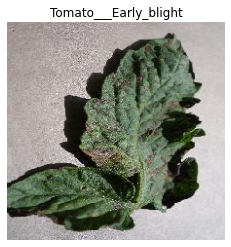

In [41]:
from keras.preprocessing import image
import numpy as np
image_path = "../input/new-plant-diseases-dataset/test/test/TomatoEarlyBlight6.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [ ]:
model=leaf-cnn.h5

In [ ]:
model.save('leaf-cnn-300.h5')

In [ ]:
model.save('leaf-cnn-V2-0.3-200.h5')

In [ ]:
model.save('../input/all-model/leaf-cnn-dropout0.3-200.h5')

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('../input/allmodel/leaf-cnn-dropout0.5alpha0.75-200.h5')

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
from os import listdir
import cv2
from keras.preprocessing.image import img_to_array
default_image_size=(256,256)
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(base_dir+"/train")
    
    for plant_folder in root_dir :
        print(f"[INFO] Processing {plant_folder} ...")
        plant_disease_image_list = listdir(f"{base_dir}/train/{plant_folder}/")
      
        for image in plant_disease_image_list[:200]:
            image_directory = f"{base_dir}/train/{plant_folder}/{image}"
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

In [ ]:
from sklearn.preprocessing import LabelBinarizer
import pickle
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [ ]:
x_train, y_train = np_image_list, image_labels

In [ ]:
from os import listdir
import cv2
from keras.preprocessing.image import img_to_array
default_image_size=(256,256)
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(base_dir+"/valid")
    
    for plant_folder in root_dir :
        print(f"[INFO] Processing {plant_folder} ...")
        plant_disease_image_list = listdir(f"{base_dir}/valid/{plant_folder}/")
      
        for image in plant_disease_image_list[:200]:
            image_directory = f"{base_dir}/valid/{plant_folder}/{image}"
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_folder)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

In [ ]:
from sklearn.preprocessing import LabelBinarizer
import pickle
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [ ]:
x_test, y_test = np_image_list, image_labels

In [ ]:
del np_image_list
del image_labels

In [ ]:
base_model = keras.applications.MobileNet(weights="imagenet",include_top=False,input_shape=(image_size,image_size,3))

In [ ]:
base_model.trainable = False
inputs = keras.Input(shape=(image_size,image_size,3))
x = base_model(inputs,training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(38,activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=x, name="LeafDisease_MobileNet")

In [ ]:
optimizer = keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss=keras.losses.CategoricalCrossentropy(from_logits=True),metrics=[keras.metrics.CategoricalAccuracy()])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
aug=ImageDataGenerator()

In [ ]:
history = model.fit(
    aug.flow(x_train, y_train, batch_size=32),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // 32,
    epochs=100,
    verbose=1
    )